<a href="https://colab.research.google.com/github/JNK234/Fast.ai-Projects/blob/master/Blogs/End_to_End_computer_vision_model_with_Fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade
!pip install nbdev

## Import the Libraries 

In [2]:
# import fastai library
from fastai.vision.all import *

# Download the data
path = untar_data(URLs.PETS)/'images'

## Display some images

/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_48.jpg
/root/.fastai/data/oxford-iiit-pet/images/Bombay_201.jpg


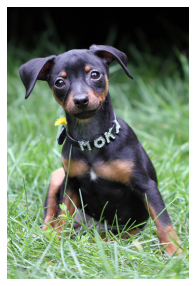

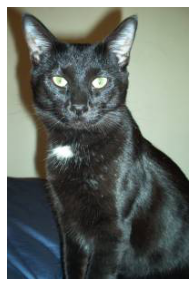

In [4]:
# get all the image paths
img_paths = path.ls()

# Define a utility function to display the image given its path
def show_image(img_path):
    print(img_path)
    img = PILImage.create(img_path)
    img.show()
    
# Display some random images
show_image(img_paths[100])
show_image(img_paths[1242])

## Initialise DataLoaders

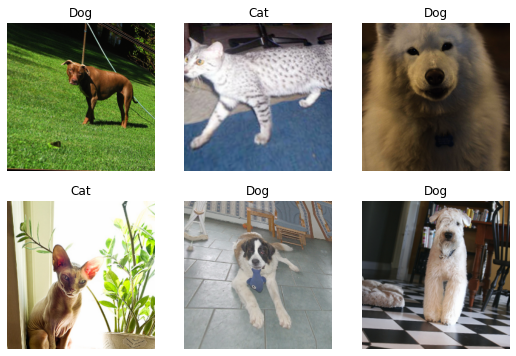

In [5]:
# Define the function to return the label
def is_cat(x):
    if x.name[0].isupper():
        return 'Cat'
    else:
        return 'Dog'
        
# Define the datablock called pets
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = is_cat,
    splitter = RandomSplitter(valid_pct=0.25, seed=42),
    item_tfms = Resize(420),
    batch_tfms = aug_transforms(size = 244, mult=1.5)
)

# Define the dataloaders from the pets datablock
dls = pets.dataloaders(path)

# Show some images from the dataloader
dls.show_batch(max_n = 6)

## Model Training

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


SuggestedLRs(lr_min=0.004786301031708717, lr_steep=3.311311274956097e-06)

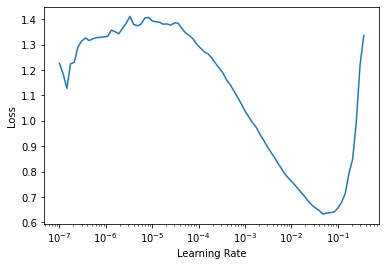

In [6]:
# Define the model using cnn_learner
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

# Find the optimal lr using lr_find()
learn.lr_find()

In [ ]:
# fine tune the model with learning rate and some freeze epochs 
learn.fine_tune(10, base_lr=3e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.188497,0.021846,0.992420,0.007580,01:00
1,0.082815,0.019758,0.994044,0.005956,01:00
2,0.065727,0.011633,0.996210,0.003790,00:59


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.033035,0.018396,0.995127,0.004873,01:02
1,0.044754,0.023142,0.991879,0.008121,01:02


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.033035,0.018396,0.995127,0.004873,01:02
1,0.044754,0.023142,0.991879,0.008121,01:02
2,0.052689,0.040318,0.988630,0.011370,01:02
3,0.033144,0.037993,0.990796,0.009204,01:02
4,0.028024,0.043147,0.988630,0.011370,01:03


In [ ]:
# create the interepreation object from our model
interep = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interep.plot_confusion_matrix()

## Export the model

In [ ]:
# Export our trained model in form of pickle file
learn.export(fname='pets_classifier.pkl')

In [ ]:
# load the model from pickle file 
load_inf = load_learner('pets_classifier.pkl')

# Perform some predictions from random images 
img1 = img_paths[1034]
show_image(img1)
load_inf.predict(img)

img1 = img_paths[2312]
show_image(img1)
load_inf.predict(img)